In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ < '1.3.0'): #update for latest scikit-learn version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.3.0


In [3]:
dataset = pd.read_csv("Consolidated Regular Season Data.csv")
dataset.head()

,Rk,Team,Season (end),Age,W,L,PW,PL,MOV,SOS,...,FT/FGA,Playoffs,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Successful,Arena,Attend.,Attend./G
0,1,Miami Heat*,2011,29.0,58,24,61,21,7.46,-0.71,...,0.279,1.0,0.475,12.6,75.5,0.223,1,AmericanAirlines Arena,"810,930","19,779"
1,2,Chicago Bulls*,2011,26.4,62,20,61,21,7.32,-0.79,...,0.227,1.0,0.463,13.6,76.2,0.222,1,United Center,"893,462","21,792"
2,3,Los Angeles Lakers*,2011,30.2,57,25,58,24,6.11,-0.10,...,0.228,1.0,0.477,12.8,72.3,0.181,0,STAPLES Center,"778,877","18,997"
3,4,San Antonio Spurs*,2011,28.8,61,21,56,26,5.71,0.16,...,0.229,1.0,0.491,12.6,74.6,0.190,0,AT&T Center,"750,879","18,314"
4,5,Boston Celtics*,2011,29.5,56,26,57,25,5.37,-0.54,...,0.235,1.0,0.469,14.8,74.7,0.235,0,TD Garden,"763,584","18,624"


    Pace_rounded  Successful
0           88.0           1
1           89.0           0
2           90.0           3
3           91.0           5
4           92.0           2
5           93.0           5
6           94.0           3
7           95.0           3
8           96.0           5
9           97.0           6
10          98.0           8
11          99.0           2
12         100.0           4
13         101.0           3
14         102.0           1
15         103.0           1
16         104.0           0
17         105.0           0


/Users/milan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '88.0'),
  Text(1, 0, '89.0'),
  Text(2, 0, '90.0'),
  Text(3, 0, '91.0'),
  Text(4, 0, '92.0'),
  Text(5, 0, '93.0'),
  Text(6, 0, '94.0'),
  Text(7, 0, '95.0'),
  Text(8, 0, '96.0'),
  Text(9, 0, '97.0'),
  Text(10, 0, '98.0'),
  Text(11, 0, '99.0'),
  Text(12, 0, '100.0'),
  Text(13, 0, '101.0'),
  Text(14, 0, '102.0'),
  Text(15, 0, '103.0'),
  Text(16, 0, '104.0'),
  Text(17, 0, '105.0')])

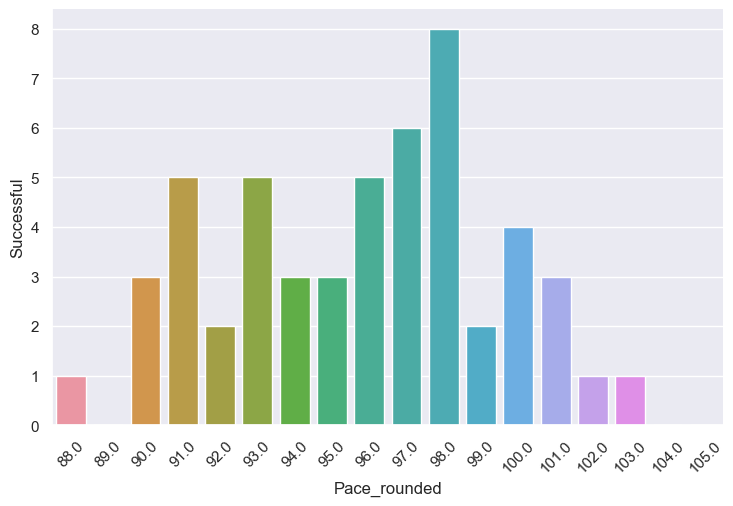

In [4]:
# Aggregate data
# Round the 'pace' column to the nearest whole number
dataset['Pace_rounded'] = dataset['Pace'].round()
aggregated_data = dataset.groupby('Pace_rounded')['Successful'].sum().reset_index()
print(aggregated_data)
sns.catplot(data=aggregated_data, x = "Pace_rounded", y = "Successful", kind="bar", aspect=1.5)
plt.xticks(rotation=45)


/Users/milan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '0.48'),
  Text(1, 0, '0.49'),
  Text(2, 0, '0.5'),
  Text(3, 0, '0.51'),
  Text(4, 0, '0.52'),
  Text(5, 0, '0.53'),
  Text(6, 0, '0.54'),
  Text(7, 0, '0.55'),
  Text(8, 0, '0.56'),
  Text(9, 0, '0.57'),
  Text(10, 0, '0.58'),
  Text(11, 0, '0.59'),
  Text(12, 0, '0.6'),
  Text(13, 0, '0.61')])

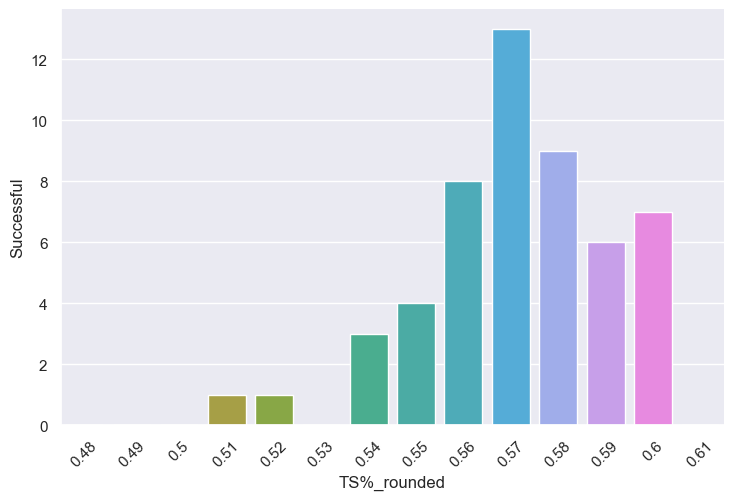

In [8]:
dataset['TS%_rounded'] = dataset['TS%'].round(2)
ts_data = dataset.groupby('TS%_rounded')['Successful'].sum().reset_index()
sns.catplot(data=ts_data, x = "TS%_rounded", y = "Successful", kind="bar", aspect=1.5)
plt.xticks(rotation=45)

/Users/milan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '95.0'),
  Text(1, 0, '96.0'),
  Text(2, 0, '99.0'),
  Text(3, 0, '100.0'),
  Text(4, 0, '101.0'),
  Text(5, 0, '102.0'),
  Text(6, 0, '103.0'),
  Text(7, 0, '104.0'),
  Text(8, 0, '105.0'),
  Text(9, 0, '106.0'),
  Text(10, 0, '107.0'),
  Text(11, 0, '108.0'),
  Text(12, 0, '109.0'),
  Text(13, 0, '110.0'),
  Text(14, 0, '111.0'),
  Text(15, 0, '112.0'),
  Text(16, 0, '113.0'),
  Text(17, 0, '114.0'),
  Text(18, 0, '115.0'),
  Text(19, 0, '116.0'),
  Text(20, 0, '117.0'),
  Text(21, 0, '118.0'),
  Text(22, 0, '119.0')])

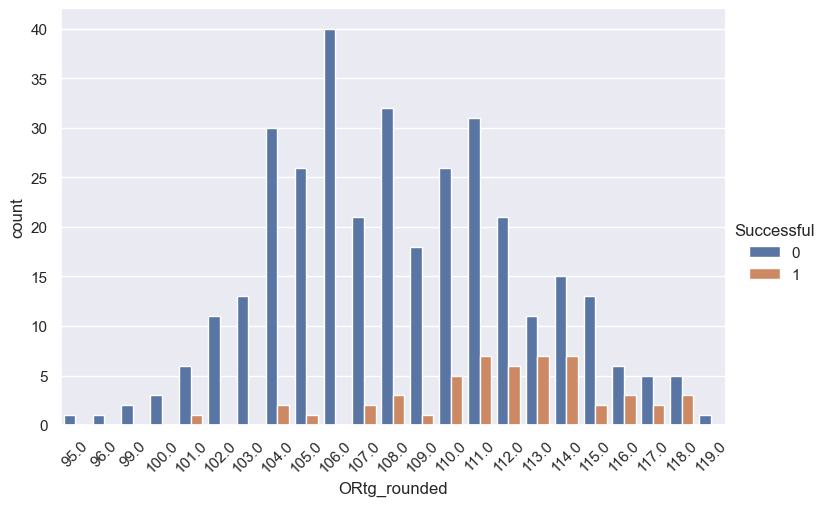

In [75]:
dataset['ORtg_rounded'] = dataset['ORtg'].round()
dataset['DRtg_rounded'] = dataset['DRtg'].round()
ORtg_data = dataset.groupby('ORtg_rounded')['Successful'].sum().reset_index()
sns.catplot(data=dataset, x = "ORtg_rounded", kind="count", aspect=1.5, hue="Successful")
plt.xticks(rotation=45)

/Users/milan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 90.,  95., 100., 105., 110., 115., 120., 125.]),
 [Text(90.0, 0, '90'),
  Text(95.0, 0, '95'),
  Text(100.0, 0, '100'),
  Text(105.0, 0, '105'),
  Text(110.0, 0, '110'),
  Text(115.0, 0, '115'),
  Text(120.0, 0, '120'),
  Text(125.0, 0, '125')])

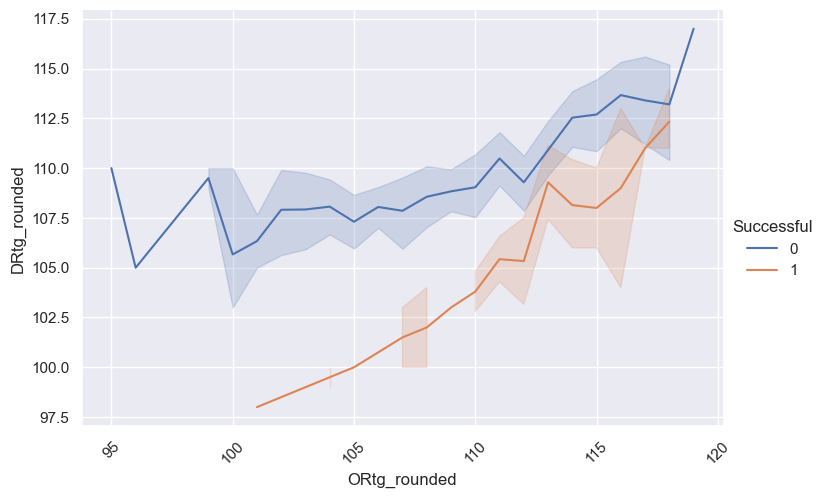

In [76]:
dataset['ORtg_rounded'] = dataset['ORtg'].round()
dataset['DRtg_rounded'] = dataset['DRtg'].round()
sns.relplot(data=dataset, x = "ORtg_rounded", y = "DRtg_rounded", kind="line", aspect=1.5, hue="Successful")
plt.xticks(rotation=45)

/Users/milan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

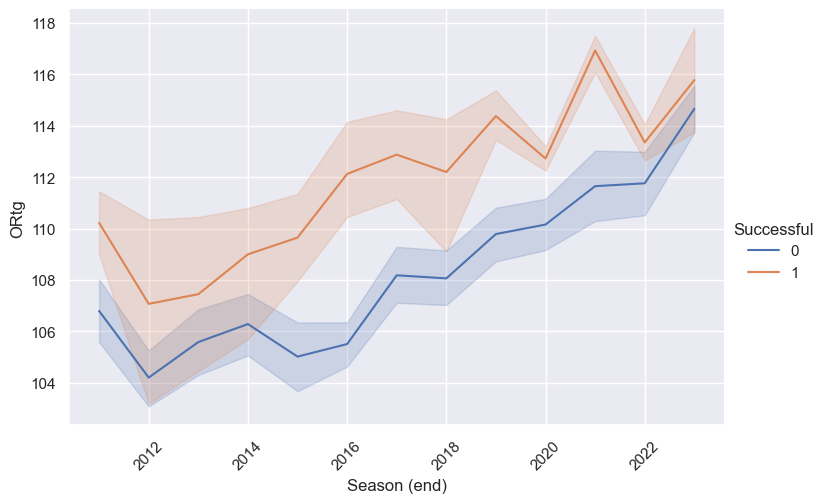

In [77]:
dataset['ORtg_avg'] = np.mean(dataset['ORtg'])
# ORtg_avg= dataset.groupby('ORtg_avg')['Year'].sum().reset_index()
sns.relplot(data=dataset, x = "Season (end)", y = "ORtg", kind="line", aspect=1.5, hue="Successful")
plt.xticks(rotation=45)

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

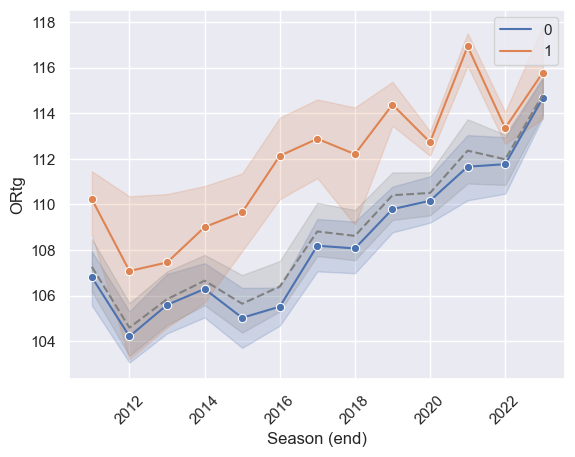

In [78]:
# ORtg_avg= dataset.groupby('ORtg_avg')['Year'].sum().reset_index()
sns.lineplot(data=dataset, x="Season (end)", y="ORtg", hue="Successful", marker="o")
sns.lineplot(data=dataset, x="Season (end)", y="ORtg", color="grey", linestyle="--")
plt.xticks(rotation=45)

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

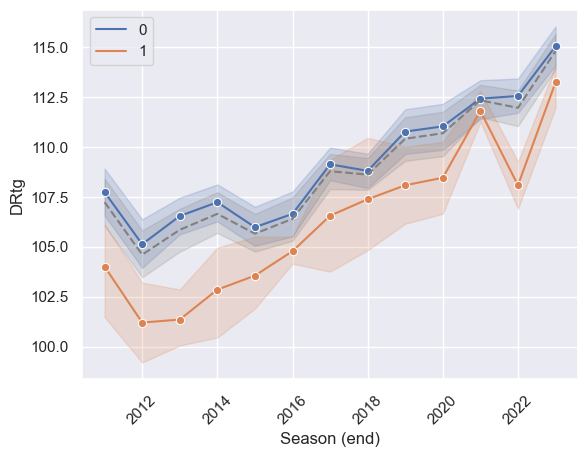

In [79]:
sns.lineplot(data=dataset, x="Season (end)", y="DRtg", hue="Successful", marker="o")
sns.lineplot(data=dataset, x="Season (end)", y="DRtg", color="grey", linestyle="--")
plt.xticks(rotation=45)

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

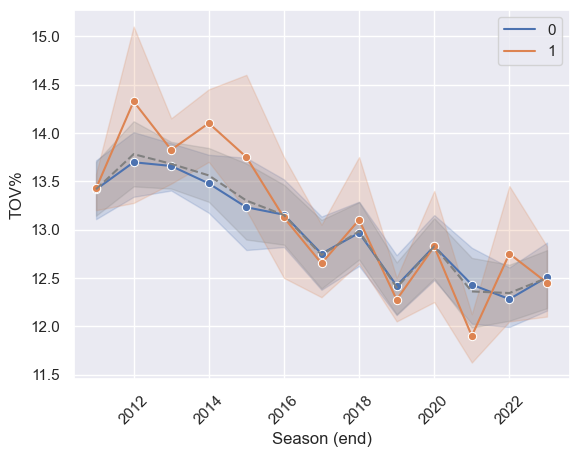

In [80]:
sns.lineplot(data=dataset, x="Season (end)", y="TOV%", hue="Successful", marker="o")
sns.lineplot(data=dataset, x="Season (end)", y="TOV%", color="grey", linestyle="--")
plt.xticks(rotation=45)

/Users/milan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 9., 10., 11., 12., 13., 14., 15., 16., 17.]),
 [Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17')])

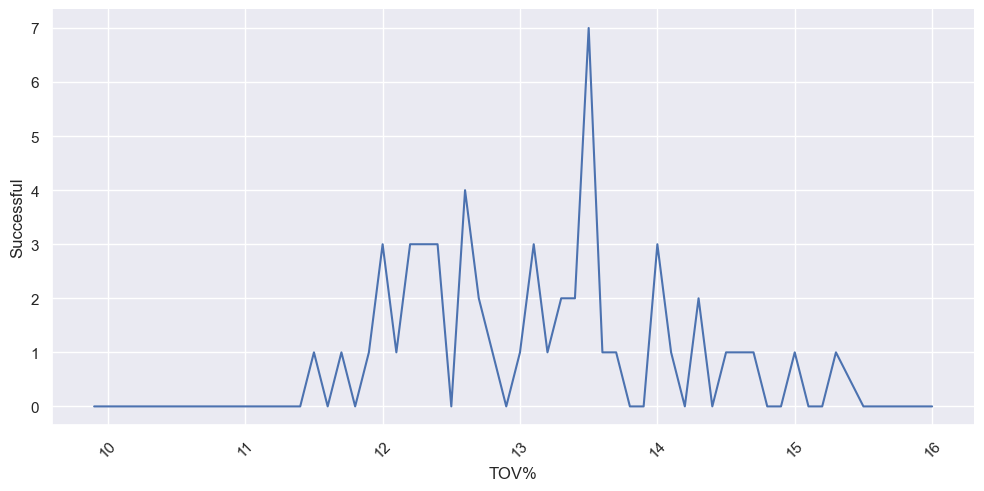

In [81]:
ORtg_data = dataset.groupby('TOV%')['Successful'].sum().reset_index()
sns.relplot(data=ORtg_data, x = "TOV%", y = "Successful", kind="line", aspect=2)
plt.xticks(rotation=45)